In [1]:
import pandas as pd
import io


# Extracting the relevant log data from the file
def extract_log_data(file_path):
    with open(file_path, 'r') as file:
        # Find the start of the relevant log data
        for line in file:
            if 'Nodes' in line:
                print(line)
                break
        
        # Read and store the log data until an empty line is encountered
        log_data = []
        for line in file:
            if 'Cutting planes' in line:
                break
            log_data.append(line)
    
    return log_data


file_path = "../result/log_sampled_5.txt"
# Extract and parse the log data
log_data = extract_log_data(file_path)


# df.head()  # Displaying the first few rows of the DataFrame to verify the extraction and parsing


    Nodes    |    Current Node    |     Objective Bounds      |     Work



In [3]:
# Further refining the parsing logic to handle empty lines and irregular data formats

column_names = ["Expl", "Unexpl", "Obj", "Depth", "IntInf", "Incumbent", "BestBd", "Gap", "It/Node", "Time"]

def parse_log_data(buffer):
    parsed_data = []

    for line in buffer.readlines()[2:]:  # Skipping header and empty line
        # Splitting the line by spaces while considering potential missing values
        split_line = line.split()
        
        # Skipping completely empty lines
        if not split_line:
            continue

        # Handling missing values and inconsistencies
        data_row = []
        for i, col in enumerate(column_names):
            if i < len(split_line):
                data_row.append(split_line[i])
            else:
                data_row.append(None)
        
        parsed_data.append(data_row)

    # Creating DataFrame from parsed data
    return pd.DataFrame(parsed_data, columns=column_names)


buffer = io.StringIO('\n'.join(log_data))
df = parse_log_data(buffer)

df.head()


,Expl,Unexpl,Obj,Depth,IntInf,Incumbent,BestBd,Gap,It/Node,Time
0,0,0,-5502.2079,0,5,-,-5502.2079,-,-,0s
1,H,0,0,-1246.769420,-5502.2079,341%,-,0s,None,None
2,0,0,-5458.0340,0,8,-1246.7694,-5458.0340,338%,-,0s
3,0,0,-5386.6029,0,5,-1246.7694,-5386.6029,332%,-,0s
4,0,0,-4927.2909,0,5,-1246.7694,-4927.2909,295%,-,0s


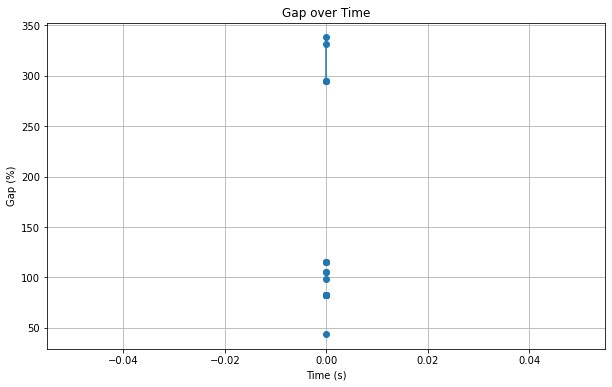

In [4]:
import matplotlib.pyplot as plt

# Function to convert time string to numerical value (in seconds)
def convert_time_to_seconds(time_str):
    if time_str and 's' in time_str:
        return float(time_str.replace('s', ''))
    return None

# Function to convert gap percentage to numerical value
def convert_gap_to_percentage(gap_str):
    if gap_str and '%' in gap_str:
        return float(gap_str.replace('%', ''))
    return None

# Applying the conversion functions to the DataFrame
df['Time'] = df['Time'].apply(convert_time_to_seconds)
df['Gap'] = df['Gap'].apply(convert_gap_to_percentage)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Gap'], marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Gap (%)')
plt.title('Gap over Time')
plt.grid(True)
plt.show()
